## Setup

In [ ]:
!pip3 install --upgrade pip -q
!pip3 install nvidia-cublas-cu12==12.4.5.8 nvidia-cuda-cupti-cu12==12.4.127 nvidia-cuda-nvrtc-cu12==12.4.127 nvidia-cuda-runtime-cu12==12.4.127 nvidia-cudnn-cu12==9.1.0.70 nvidia-cufft-cu12==11.2.1.3 nvidia-curand-cu12==10.3.5.147 nvidia-cusolver-cu12==11.6.1.9 nvidia-cusparse-cu12==12.3.1.170 nvidia-nvjitlink-cu12==12.4.127 -q
!pip3 install nltk emoji==0.6.0 -q
!pip3 install torchinfo -q
!pip3 install kagglehub -q
!pip3 install kaggle -q
!pip3 install transformers -q
!pip3 install evaluate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 167.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
!pip3 install fsspec==2025.3.0 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.3.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# list the elements in the current working directory
print("current directory: ", os.getcwd())
#os.chdir('content/drive/MyDrive/DATASCI 266/Project') # Use when working on Berkeley's Google Drive
os.chdir('drive/MyDrive/Knowledge/Berkeley/DATASCI 266/Project') # Use when working on Personal Google Drive
os.listdir()

current directory:  /content


['Project Proposal.gdoc',
 'TweetNormalizer.py',
 '__pycache__',
 'results_baseline',
 'wandb',
 'Tweets_full_normalized.csv',
 'baseline_model',
 'bertweet_model',
 'bertkeep_model',
 'Copy of Lora_(Roberta_Large)_pytorch.ipynb',
 'filtered_tweets.csv',
 'filtered_sample_2500.csv',
 'Normalized_filtered_tweets.csv',
 'Crypto Sentiment Analysis.ipynb',
 'labelled_normalized_dataset.csv',
 'small_train_dataset.csv',
 'small_eval_dataset.csv',
 'small_eval_dataset_filtered.csv',
 'small_train_dataset_filtered.csv',
 'labelled_dataset.csv',
 'bertkeep_model5',
 'bertweet_model_6',
 'bertweet_model_7',
 'bertweet_model_8',
 'bertweet_model_9',
 'bertkeep_model_9',
 'bertkeep_model_10',
 'bertkeep_model_11',
 'Paper',
 'tweets_sentiment.csv',
 'File Index.gsheet',
 'Crypto Sentiment Analysis_Data Preparation.ipynb',
 'Copy of Crypto Sentiment Analysis_BERTweet.ipynb',
 'Copy of Crypto Sentiment Analysis.ipynb',
 'Crypto Sentiment Analysis_BERTweet.ipynb']

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

import torch
from torchinfo import summary # to show the summary of the models
import evaluate # for metric evaluation during training from Huggingface
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification, pipeline, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from TweetNormalizer import normalizeTweet
from datasets import Dataset # from Huggingface

from peft import get_peft_config, PeftModel, PeftConfig, get_peft_model, LoraConfig, TaskType


## Data Analysis

Data Source: Kaggle  
Location in Kaggle: fabioturazzi/cryptocurrency-tweets-with-sentiment-analysis  
File name: tweets_sentiment.csv    
Link: https://www.kaggle.com/api/v1/datasets/download/fabioturazzi/cryptocurrency-tweets-with-sentiment-analysis?dataset_version_number=1  

In [ ]:
# Download latest version of the data set from Kaggle
path = kagglehub.dataset_download("fabioturazzi/cryptocurrency-tweets-with-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:08<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fabioturazzi/cryptocurrency-tweets-with-sentiment-analysis/versions/1


In [ ]:
file_name = "tweets_sentiment.csv"
df = pd.read_csv(path + "/" + file_name)

<ipython-input-7-758bb0830731>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "/" + file_name)


,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,retweet_date,translate,trans_src,trans_dest,search,decoded_tweet,neg,neu,pos,compound
0,0,3.177290e+17,3.177290e+17,2013-03-29 13:05:03 Hor. de Verão do Pacífico ...,2013-03-29,13:05:03,-800,14335498.0,newsycombinator,Hacker News,...,NaN,NaN,NaN,NaN,cryptocurrency,Bitcoin: The Cyberpunk Cryptocurrency http://...,0.0,1.000,0.000,0.000
1,1,3.238530e+17,3.238530e+17,2013-04-15 10:37:11 Hor. de Verão do Pacífico ...,2013-04-15,10:37:11,-800,972651.0,mashable,Mashable,...,NaN,NaN,NaN,NaN,cryptocurrency,Bitcoin Isn't the Only Cryptocurrency in Town ...,0.0,1.000,0.000,0.000
2,2,3.236100e+17,3.236100e+17,2013-04-14 18:34:04 Hor. de Verão do Pacífico ...,2013-04-14,18:34:04,-800,5988062.0,theeconomist,The Economist,...,NaN,NaN,NaN,NaN,cryptocurrency,"#Bitcoin, a ""cryptocurrency"", went on a tear l...",0.0,1.000,0.000,0.000
3,3,3.249920e+17,3.249920e+17,2013-04-18 14:04:24 Hor. de Verão do Pacífico ...,2013-04-18,14:04:24,-800,14248784.0,drewtoothpaste,drewtoothpaste,...,NaN,NaN,NaN,NaN,cryptocurrency,I'm going to make my OWN crypto-currency and e...,0.0,0.885,0.115,0.381
4,4,3.326200e+17,3.326200e+17,2013-05-09 15:14:19 Hor. de Verão do Pacífico ...,2013-05-09,15:14:19,-800,2100521.0,jonathancoulton,Jonathan Coulton,...,NaN,NaN,NaN,NaN,cryptocurrency,"Your momma's cryptocurrency is so virtual, she...",0.0,1.000,0.000,0.000


In [ ]:
print(df.shape)
df.info()
print(f"Date range: {df.date.min()} - {df.date.max()}")


(824908, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824908 entries, 0 to 824907
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       824908 non-null  int64  
 1   id               824908 non-null  float64
 2   conversation_id  824908 non-null  float64
 3   created_at       824908 non-null  object 
 4   date             824908 non-null  object 
 5   time             824908 non-null  object 
 6   timezone         824908 non-null  int64  
 7   user_id          824908 non-null  float64
 8   username         824908 non-null  object 
 9   name             824891 non-null  object 
 10  place            149 non-null     object 
 11  tweet            824901 non-null  object 
 12  language         824908 non-null  object 
 13  mentions         824908 non-null  object 
 14  urls             824908 non-null  object 
 15  photos           824908 non-null  object 
 16  replies_count    824908 n

In [ ]:
df2 = df[['date','tweet','neg','neu','pos','compound']].copy()

In [ ]:
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

In [ ]:
df2.shape

(563799, 6)

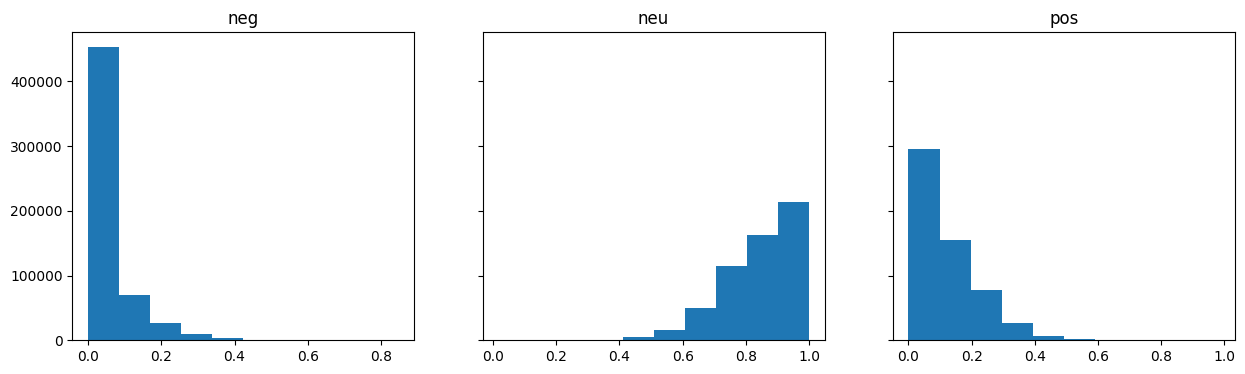

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(15, 4), sharey=True)
ax[0].hist(df2.neg)
ax[1].hist(df2.neu)
ax[2].hist(df2.pos)
ax[0].set_title('neg')
ax[1].set_title('neu')
ax[2].set_title('pos')
plt.show()

In [ ]:
df2['sentiment'] = df2[['neg', 'neu', 'pos']].idxmax(axis=1)

In [ ]:
df2.sentiment.value_counts()

,count
sentiment,
neu,560390
pos,2510
neg,899


<Axes: >

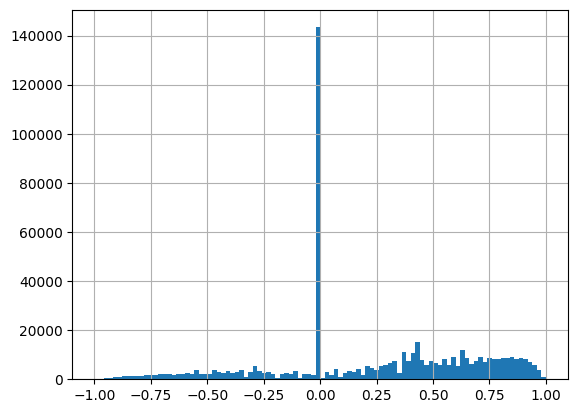

In [ ]:
df2.compound.hist(bins = 100)

In [ ]:
df2.compound.describe([0,.3333333,.6666666,1])[['33.3%','66.7%']]

,compound
33.3%,0.0000
66.7%,0.4939


In [ ]:
cutoffs_list_2 = [0,0]
cutoffs_list_3 = df2.compound.describe([0,.3333333,.6666666,1])[['33.3%','66.7%']].values.tolist()

df2['sentiment2'] = ['neg' if x < cutoffs_list_2[0] else 'pos' if x>cutoffs_list_2[1] else 'neu' for x in df2.compound]
df2['sentiment2'] = pd.Categorical(df2['sentiment2'], categories=['neg', 'neu', 'pos'], ordered=True)
df2['sentiment3'] = ['neg' if x < cutoffs_list_3[0] else 'pos' if x>cutoffs_list_3[1] else 'neu' for x in df2.compound]
df2['sentiment3'] = pd.Categorical(df2['sentiment3'], categories=['neg', 'neu', 'pos'], ordered=True)


In [ ]:
pd.crosstab(df2.sentiment3,df2.sentiment2)

sentiment2,neg,neu,pos
sentiment3,,,
neg,102580,0,0
neu,0,142841,131836
pos,0,0,186542


<Axes: xlabel='sentiment2'>

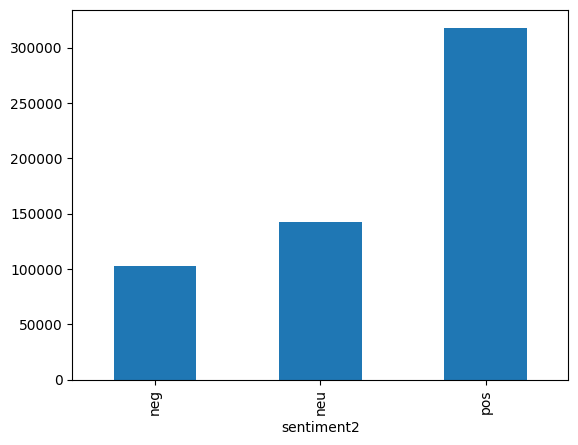

In [ ]:
df2.sentiment2.value_counts(sort = False).plot(kind='bar' )

<Axes: xlabel='sentiment3'>

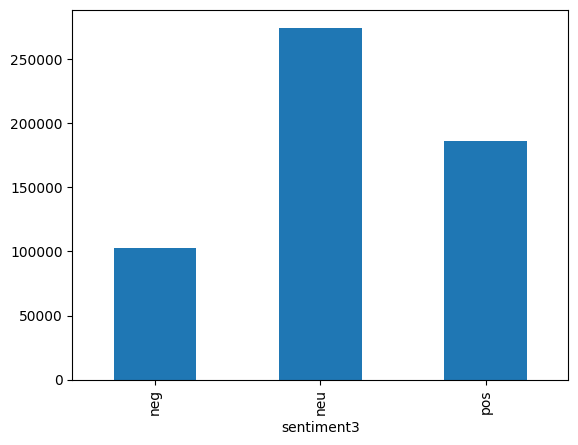

In [ ]:
df2.sentiment3.value_counts(sort = False).plot(kind='bar')

In [ ]:
sample_row = df2.sample(1)
print(sample_row.tweet.values[0],
      "\nCompound:", sample_row.compound.values[0],
      "\nSentiment 2:", sample_row.sentiment2.values[0],
      "\nSentiment 3:", sample_row.sentiment3.values[0],
      "\nNeg:", sample_row.neg.values[0],
      "\nNeu:", sample_row.neu.values[0],
      "\nPos:", sample_row.pos.values[0]
      )


What is ? : Monero is the leading with a focus on private… 
Compound: 0.0 
Sentiment 2: neu 
Sentiment 3: neu 
Neg: 0.0 
Neu: 1.0 
Pos: 0.0


In [ ]:
def examples_s2_s3(n, df, sentiment2, sentiment3):
    '''
    This function gets n random values with the defined values of sentiment2 and sentiment3
    '''
    try:
        df_output = df[(df.sentiment2 == sentiment2) & (df.sentiment3 == sentiment3)].sample(n)
        return df_output[['tweet','compound']]

    except Exception as e:
        print(e)

In [ ]:
for i in examples_s2_s3(20, df2, 'neg', 'neg').values:
    print(i)


['Payahlah dah ada girlfriend. Tapi cari perempuan lain jugak. This is so fucked up. DONT DISTURB SYAZA. BEFORE I REACH YOUR FUCKING GIRLFRIEND'
 -0.4557]
["I'm sorry. I have to retweet a retweet. And I'll keep retweeting. If I help one person wake up and protect themselves from this cancer that exposed, then I've done my job."
 -0.3716]
['"Canâ€™t Stop The Signal" T-Shirt + Fleece "FGC-9" Hats Despite all efforts by the anti-gunners, Deterrence Dispensed 3D printed gun builders route around censorship with grit, encryption, bitcoin, and privacy centric open source tech stacks. Buy today:'
 -0.1311]
['It will only take one major government to announce (or have it leaked) that they are accumulating bitcoin as a reserve asset to trigger sovereign fomo. They will have no choice! This day is coming soon. Fed banks are hosting crypto price charts!'
 -0.3786]
['XRP is a steal! Where is the price heading next?!New ODL Corridors Are Opened! The Time Is Now'
 -0.6219]
['I mined eth back in 2017

In [ ]:
# Normalize the text on the tweets
df2.tweet = df2.tweet.apply(normalizeTweet)

In [ ]:
# Clean Labels and save to disk
label_to_id = {'neg': 0, 'neu': 1, 'pos': 2}
id_to_label = {0: 'neg', 1: 'neu', 2: 'pos'}
df2.sentiment = df2.sentiment.map(label_to_id)
df2.sentiment2 = df2.sentiment2.map(label_to_id)
df2.sentiment3 = df2.sentiment3.map(label_to_id)
df2.to_csv("Tweets_full_normalized.csv")

## BERTweet

BERTweet Model: [Huggingface BERTweet](https://huggingface.co/docs/transformers/en/model_doc/bertweet)  
BERTweet Paper: [BERTweet: A pre-trained language model for English Tweets](https://aclanthology.org/2020.emnlp-demos.2.pdf)


### Data Preparation

In [ ]:
df2 = pd.read_csv("labelled_dataset.csv")
df2.tweet = df2.tweet.map(normalizeTweet)
df2.to_csv("labelled_normalized_dataset.csv")

In [ ]:
df2.tweet

,tweet
0,Bitcoin : The Cyberpunk Cryptocurrency
1,Bitcoin Is n't the Only Cryptocurrency in Town...
2,", a "" cryptocurrency "" , went on a tear last w..."
3,I 'm going to make my OWN crypto-currency and ...
4,"Your momma 's cryptocurrency is so virtual , s..."
...,...
563794,پیامرسان ها درآمد سرشاری دارند اما بزودی به هم...
563795,Hi 25 cent :beaming_face_with_smiling_eyes:
563796,$ ocean $ Ocean $ ewt $ dot $ qnt $ xrp
563797,Hi . 42 cent :sign_of_the_horns: :handshake: :...


In [ ]:
pd.DataFrame([len(i) for i in df2.tweet]).describe(percentiles=[.9,.95,.99])



,0
count,563799.000000
mean,141.214032
std,79.614512
min,4.000000
50%,129.000000
90%,258.000000
95%,279.000000
99%,311.000000
max,1611.000000


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-large")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Get a small sample with the same number of each label for tunning.

max_length =  280
sample_size = 5000

# Take the Sample Using Sentiment3
df2_sample = pd.concat(
    [df2.loc[df2.label==x,['tweet','label']].sample(sample_size) for x in df2.label.unique()])
small_train_dataset, small_eval_dataset = train_test_split(df2_sample, test_size=0.2)

# Preprocess your datasets

small_train_dataset = small_train_dataset.rename(columns={"label": "labels"})
small_eval_dataset = small_eval_dataset.rename(columns={"label": "labels"})

small_train_dataset.to_csv("small_train_dataset.csv")
small_eval_dataset.to_csv("small_eval_dataset.csv")


### BERTweet Baseline Classifier

In [ ]:
# Load the model from Huggingface

bertweet = AutoModelForSequenceClassification.from_pretrained("vinai/bertweet-large",
                                                              problem_type="single_label_classification",
                                                              num_labels = 3)
# Transforming the pandas to huggingface datasets
small_train_dataset = Dataset.from_pandas(small_train_dataset, preserve_index=False)
small_eval_dataset = Dataset.from_pandas(small_eval_dataset, preserve_index=False)

# Define the preprocess function
def preprocess_tweet(data):
    review_text = data['tweet']
    encoded = tokenizer.batch_encode_plus(
            review_text,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_token_type_ids=True,
            return_tensors="pt"
        )
    encoded['labels'] = torch.tensor(data['labels'])
    return encoded

small_train_dataset = small_train_dataset.map(preprocess_tweet, batched=True)
small_eval_dataset = small_eval_dataset.map(preprocess_tweet, batched=True)


pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
for i in small_train_dataset.select(range(3)):
    print(i)

{'tweet': 'now accepting offers to let me beat the shit out of u with a baguette for bitcoin . hmu', 'labels': 2, 'input_ids': [0, 8310, 8394, 1523, 7, 905, 162, 1451, 5, 15328, 66, 9, 1717, 19, 10, 3298, 257, 3398, 13, 11388, 479, 1368, 24249, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Freezing the pretrained layers

In [ ]:
for name, param in bertweet.named_parameters():
    print(name)

roberta.embeddings.word_embeddings.weight
roberta.embeddings.position_embeddings.weight
roberta.embeddings.token_type_embeddings.weight
roberta.embeddings.LayerNorm.weight
roberta.embeddings.LayerNorm.bias
roberta.encoder.layer.0.attention.self.query.weight
roberta.encoder.layer.0.attention.self.query.bias
roberta.encoder.layer.0.attention.self.key.weight
roberta.encoder.layer.0.attention.self.key.bias
roberta.encoder.layer.0.attention.self.value.weight
roberta.encoder.layer.0.attention.self.value.bias
roberta.encoder.layer.0.attention.output.dense.weight
roberta.encoder.layer.0.attention.output.dense.bias
roberta.encoder.layer.0.attention.output.LayerNorm.weight
roberta.encoder.layer.0.attention.output.LayerNorm.bias
roberta.encoder.layer.0.intermediate.dense.weight
roberta.encoder.layer.0.intermediate.dense.bias
roberta.encoder.layer.0.output.dense.weight
roberta.encoder.layer.0.output.dense.bias
roberta.encoder.layer.0.output.LayerNorm.weight
roberta.encoder.layer.0.output.LayerNorm

In [ ]:
for name, param in bertweet.named_parameters():
    if name.split(".")[0] == "roberta":
        param.requires_grad = False

print("Layers to train:\n")
for name, param in bertweet.named_parameters():
    if param.requires_grad :
      print(name)
print("\nBaseline model Structure\n")
summary(bertweet)

Layers to train:

classifier.dense.weight
classifier.dense.bias
classifier.out_proj.weight
classifier.out_proj.bias

Baseline model Structure



Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        (51,471,360)
│    │    └─Embedding: 3-2                                        (526,336)
│    │    └─Embedding: 3-3                                        (1,024)
│    │    └─LayerNorm: 3-4                                        (2,048)
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       (302,309,376)
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                1,049,600
│    └─Dropout: 2-4                                  

In [ ]:
# Create Training arguments
training_args = TrainingArguments(
    output_dir='./results_baseline',
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16
)

metric = evaluate.load('accuracy')

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

#Training
trainer = Trainer(
    model=bertweet,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<ipython-input-29-a98832f4e358>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: marcos-geraldo (marcos-geraldo-university-of-california-berkeley) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,1.081900,1.078765,0.394667
2,1.068400,1.075655,0.396667
3,1.056800,1.064167,0.426667
4,1.052100,1.062978,0.434333
5,1.050400,1.059906,0.444333


TrainOutput(global_step=3750, training_loss=1.062784969075521, metrics={'train_runtime': 3857.2394, 'train_samples_per_second': 15.555, 'train_steps_per_second': 0.972, 'total_flos': 3.05791011792e+16, 'train_loss': 1.062784969075521, 'epoch': 5.0})

In [ ]:
# write the baseline model
output_dir = "./baseline_model"
trainer.save_model(output_dir)

In [ ]:
# Read the baseline model from the folder
output_dir = "./baseline_model"
baseline_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)


## LoRA Fine Tunning


In [ ]:
### Check Point: After running the Setup section you can strt from here
try:
  baseline_model = bertweet
except:
  output_dir = "./baseline_model"
  baseline_model = AutoModelForSequenceClassification.from_pretrained(output_dir)
  tokenizer = AutoTokenizer.from_pretrained(output_dir)

In [ ]:
try :
  small_train_dataset.head()
except:
# Load training data
  df2 = pd.read_csv("Tweets_full_normalized.csv")
  small_train_dataset = pd.read_csv("small_train_dataset.csv")
  small_eval_dataset = pd.read_csv("small_eval_dataset.csv")
  small_train_dataset = Dataset.from_pandas(small_train_dataset, preserve_index=False)
  small_eval_dataset = Dataset.from_pandas(small_eval_dataset, preserve_index=False)
  max_length =  280

  # Define the preprocess function
  def preprocess_tweet(data):
      review_text = data['tweet']
      encoded = tokenizer.batch_  encode_plus(
              review_text,
              max_length=max_length,
              padding='max_length',
              truncation=True,
              return_attention_mask=True,
              return_token_type_ids=True,
              return_tensors="pt"
          )
      encoded['labels'] = torch.tensor(data['labels'])
      return encoded

  small_train_dataset = small_train_dataset.map(preprocess_tweet, batched=True)
  small_eval_dataset = small_eval_dataset.map(preprocess_tweet, batched=True)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
for name, param in baseline_model.named_parameters():
    if name.split(".")[0] == "roberta":
        param.requires_grad = False

print("Layers to train:\n")
for name, param in baseline_model.named_parameters():
    if param.requires_grad :
      print(name)
print("\nBaseline model Structure\n")
summary(baseline_model)

Layers to train:

classifier.dense.weight
classifier.dense.bias
classifier.out_proj.weight
classifier.out_proj.bias

Baseline model Structure



Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        (51,471,360)
│    │    └─Embedding: 3-2                                        (526,336)
│    │    └─Embedding: 3-3                                        (1,024)
│    │    └─LayerNorm: 3-4                                        (2,048)
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       (302,309,376)
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                1,049,600
│    └─Dropout: 2-4                                  

In [ ]:
# LoRA Parameters 6

r = 4
lora_alpha = 64
lora_dropout = 0.1

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, inference_mode=False, r=r, lora_alpha=lora_alpha, lora_dropout=lora_dropout
)
bertweet_model = get_peft_model(baseline_model, peft_config)
bertweet_model.print_trainable_parameters()

trainable params: 1,445,891 || all params: 356,808,710 || trainable%: 0.4052


In [ ]:
_= bertweet_model.to("cuda")
summary(bertweet_model)

Layer (type:depth-idx)                                                      Param #
PeftModelForSequenceClassification                                          --
├─LoraModel: 1-1                                                            --
│    └─RobertaForSequenceClassification: 2-1                                --
│    │    └─RobertaModel: 3-1                                               354,703,360
│    │    └─ModulesToSaveWrapper: 3-2                                       2,105,350
Total params: 356,808,710
Trainable params: 1,445,891
Non-trainable params: 355,362,819

In [ ]:
lr = 1e-5
batch_size = 16
num_epochs = 5
weight_decay = 0.01

training_args = TrainingArguments(
    output_dir="bertweet_model",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True,
)

metric = evaluate.load('accuracy')

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
summary(bertweet_model)

Layer (type:depth-idx)                                                      Param #
PeftModelForSequenceClassification                                          --
├─LoraModel: 1-1                                                            --
│    └─RobertaForSequenceClassification: 2-1                                --
│    │    └─RobertaModel: 3-1                                               354,703,360
│    │    └─ModulesToSaveWrapper: 3-2                                       2,105,350
Total params: 356,808,710
Trainable params: 1,445,891
Non-trainable params: 355,362,819

In [ ]:
summary(baseline_model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        (51,471,360)
│    │    └─Embedding: 3-2                                        (526,336)
│    │    └─Embedding: 3-3                                        (1,024)
│    │    └─LayerNorm: 3-4                                        (2,048)
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       302,702,592
├─ModulesToSaveWrapper: 1-2                                       --
│    └─RobertaClassificationHead: 2-3                             --
│    │    └─Linear: 3-7                                       

In [ ]:
trainer = Trainer(
    model=bertweet_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.841100,0.864409,0.646000
2,0.643600,0.761696,0.686000
3,0.833100,0.727114,0.705667
4,0.658000,0.686406,0.724667
5,0.727700,0.676531,0.731667


TrainOutput(global_step=3750, training_loss=0.7579046290079753, metrics={'train_runtime': 7032.9285, 'train_samples_per_second': 8.531, 'train_steps_per_second': 0.533, 'total_flos': 3.0724846992e+16, 'train_loss': 0.7579046290079753, 'epoch': 5.0})

In [ ]:
output_dir = "./bertweet_model_6"
trainer.save_model(output_dir)

In [ ]:
# LoRA Parameters 7

r = 16
lora_alpha = 32
lora_dropout = 0.1
lr = 1e-5
batch_size = 16
num_epochs = 5
weight_decay = 0.01

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, inference_mode=False, r=r, lora_alpha=lora_alpha, lora_dropout=lora_dropout
)
bertweet_model = get_peft_model(baseline_model, peft_config)
bertweet_model.print_trainable_parameters()
_= bertweet_model.to("cuda")

training_args = TrainingArguments(
    output_dir="bertweet_model_7",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True,
)

metric = evaluate.load('accuracy')

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=bertweet_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
output_dir = "./bertweet_model_7"
trainer.save_model(output_dir)

trainable params: 2,625,539 || all params: 357,988,358 || trainable%: 0.7334


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.902100,0.896610,0.618667
2,0.689500,0.815001,0.662333
3,0.882500,0.785281,0.682667
4,0.710700,0.749804,0.689667
5,0.823400,0.741373,0.694000


In [ ]:
# LoRA Parameters 8

r = 16
lora_alpha = 16
lora_dropout = 0.1
lr = 1e-5
batch_size = 16
num_epochs = 5
weight_decay = 0.01


peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, inference_mode=False, r=r, lora_alpha=lora_alpha, lora_dropout=lora_dropout
)
bertweet_model = get_peft_model(baseline_model, peft_config)
bertweet_model.print_trainable_parameters()
_= bertweet_model.to("cuda")

training_args = TrainingArguments(
    output_dir="bertweet_model_8",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True,
)

metric = evaluate.load('accuracy')

trainer = Trainer(
    model=bertweet_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
output_dir = "./bertweet_model_8"
trainer.save_model(output_dir)

trainable params: 2,625,539 || all params: 357,988,358 || trainable%: 0.7334


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.952000,0.947863,0.576000
2,0.776800,0.867914,0.634000
3,0.934100,0.835429,0.662333
4,0.755600,0.810064,0.670667
5,0.894200,0.805889,0.671333


In [ ]:
# LoRA Parameters 9

r = 16
lora_alpha = 64
lora_dropout = 0.1
lr = 1e-5
batch_size = 16
num_epochs = 5
weight_decay = 0.01


peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, inference_mode=False, r=r, lora_alpha=lora_alpha, lora_dropout=lora_dropout
)
bertweet_model = get_peft_model(baseline_model, peft_config)
bertweet_model.print_trainable_parameters()
_= bertweet_model.to("cuda")

training_args = TrainingArguments(
    output_dir="bertweet_model_9",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True,
)

metric = evaluate.load('accuracy')

trainer = Trainer(
    model=bertweet_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
output_dir = "./bertweet_model_9"
trainer.save_model(output_dir)

trainable params: 2,625,539 || all params: 357,988,358 || trainable%: 0.7334


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.823800,0.863430,0.642333
2,0.615400,0.746299,0.687000
3,0.810100,0.718445,0.708667
4,0.636300,0.683729,0.721667
5,0.722700,0.670771,0.727333


In [ ]:
# LoRA Parameters 5

r = 8
lora_alpha = 64
lora_dropout = 0.05
lr = 1e-5
batch_size = 16
num_epochs = 5
weight_decay = 0.01


peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, inference_mode=False, r=r, lora_alpha=lora_alpha, lora_dropout=lora_dropout
)
bertweet_model = get_peft_model(baseline_model, peft_config)
bertweet_model.print_trainable_parameters()
_= bertweet_model.to("cuda")

training_args = TrainingArguments(
    output_dir="bertweet_model_9",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=10,
    load_best_model_at_end=True,
)

metric = evaluate.load('accuracy')

trainer = Trainer(
    model=bertweet_model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
output_dir = "./bertweet_model_9"
trainer.save_model(output_dir)

trainable params: 1,839,107 || all params: 357,201,926 || trainable%: 0.5149


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: marcos-geraldo (marcos-geraldo-university-of-california-berkeley) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,0.829500,0.853440,0.648000
2,0.620100,0.747941,0.691000
3,0.812100,0.725866,0.709000
4,0.630200,0.679427,0.722667
5,0.719500,0.668543,0.727000
